Train a LinearSVC on a linearly separable dataset. Then train an SVC and a
SGDClassifier on the same dataset. See if you can get them to produce roughly
the same model.

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns

iris = load_iris()
X = np.array(iris.data)
y = np.array(iris.target)
labels = iris.target_names
features = iris.feature_names

In [2]:
# Linear Support Vector Machine Classifier pipeline
svm_clf = Pipeline([ # pipeline for data to be fed through
("scaler", StandardScaler()), # standardize the data
("linear_svc", LinearSVC(C=1, loss="hinge", max_iter = 10**6)), # model to use
])

# Stochastic Gradient Descent Classifier pipeline
sgd_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd_classifier", SGDClassifier(random_state = 42,))
])

In [3]:
# make a quick pandas df so that I can read the data much more easily
iris_df = pd.DataFrame(X, columns = features, dtype = float)
iris_df["label"] = pd.Series(y)

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = .2)

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
svm_clf.fit(X_train, y_train)
sgd_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_valid)
sgd_pred = sgd_clf.predict(X_valid)
print("Accuracy score of svm_clf is: ", accuracy_score(svm_pred,y_valid))
print("Accuracy score of sgd_clf is: ", accuracy_score(sgd_pred,y_valid))

Accuracy score of svm_clf is:  0.9
Accuracy score of sgd_clf is:  0.9


In [7]:
from sklearn.model_selection import GridSearchCV

# let's play around with the C hyperparameter
param_grid = [{'C': [1, 3, 10, 30, 50, 70, 90, 100],
               'max_iter':[10**5,10**6,10**7]}]
# have to create new classifiers and data inputs because we can't pass a pipeline into the gridsearch CV
svm_classifier = LinearSVC(loss='hinge')
standardize = StandardScaler()
X_prepared = standardize.fit_transform(X_train)
# setting up grid search
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5,
                           scoring="accuracy",
                           return_train_score=True)
# passing X_prepared since we originally trained the model with standardized data
grid_search.fit(X_prepared, y_train)

grid_search.best_estimator_

LinearSVC(C=30, loss='hinge', max_iter=100000)

In [8]:
svm_clf_updated = Pipeline([ # pipeline for data to be fed through
("scaler", StandardScaler()), # standardize the data
("linear_svc", LinearSVC(C=3, loss="hinge", max_iter = 10**5)), # model to use
])
svm_clf_updated.fit(X_train, y_train)
svm_pred_updated = svm_clf_updated.predict(X_valid)
print("Accuracy score of svm_clf is: ", accuracy_score(svm_pred_updated,y_valid))
print("Accuracy score of sgd_clf is: ", accuracy_score(sgd_pred,y_valid))

Accuracy score of svm_clf is:  0.9
Accuracy score of sgd_clf is:  0.9


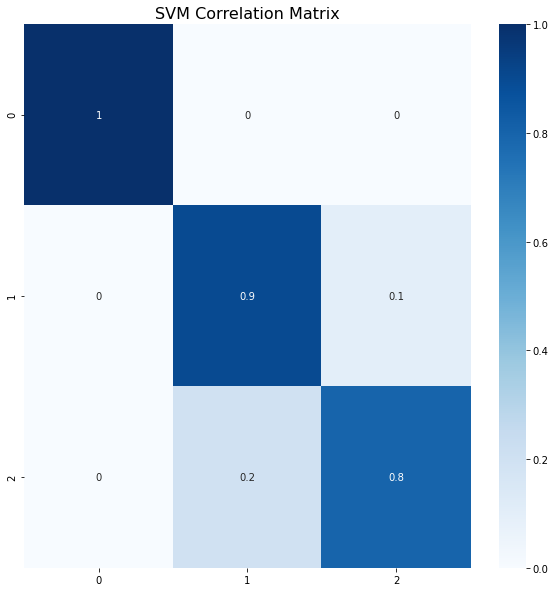

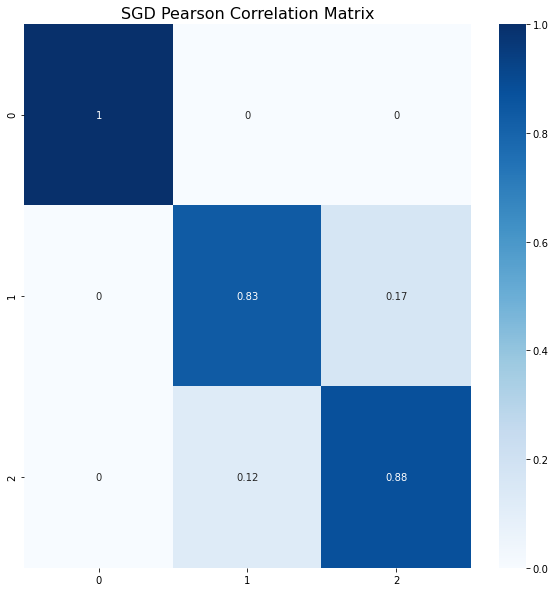

In [13]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(svm_pred_updated,y_valid, normalize = "true")
sgd_cm = confusion_matrix(sgd_pred,y_valid, normalize = "true")

plt.figure(figsize=(10,10))
plt.title('SVM Correlation Matrix', fontsize=16);
sns.heatmap(svm_cm, annot=True, cmap = 'Blues',)
plt.figure(figsize=(10,10))
plt.title('SGD Pearson Correlation Matrix', fontsize=16);
plt.subplot(sns.heatmap(sgd_cm, annot=True, cmap = 'Blues',))